# **ĐỒ ÁN MÔN HỌC: ỨNG DỤNG PHÂN TÍCH DỮ LIỆU THÔNG MINH**

## **Thực hiện:**
|<font size=4> Tên </font>|<font size=4> MSSV </font>|
|-------------------------|----------------------------------|
|<font size=4> Nguyễn Đình Hoàng Nguyên </font>|<font size=4> 19120606 </font>|

# **Giai đoạn 3: Phân tích khám phá dữ liệu**

## **3.0. Tải dữ liệu từ github**

In [1]:
!wget https://raw.githubusercontent.com/HoangNguyen31/Project_Applications-of-Intelligent-Data-Analysis/main/data/preprocessed_apartments.csv

--2024-03-05 10:05:50--  https://raw.githubusercontent.com/HoangNguyen31/Project_Applications-of-Intelligent-Data-Analysis/main/data/preprocessed_apartments.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3368670 (3.2M) [text/plain]
Saving to: ‘preprocessed_apartments.csv’

preprocessed_apartm 100%[===================>]   3.21M  --.-KB/s    in 0.07s   

2024-03-05 10:05:50 (45.3 MB/s) - ‘preprocessed_apartments.csv’ saved [3368670/3368670]



## **3.1. Import thư viện và Đọc dữ liệu**

In [2]:
import pandas as pd
import numpy as np
import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("preprocessed_apartments.csv", encoding="utf-8")
df.head()

,ad_id,list_id,area,area_name,ward,ward_name,street_name,company_ad,apartment_type,size,rooms,toilets,longitude,latitude,deposit,price_million_per_m2,price
0,155094011,114294787,119,Thành phố Thủ Đức,11221.0,Phường An Khánh (Quận 2 cũ),Trần Não,True,"Căn hộ dịch vụ, mini",30.0,1,1.0,106.7304,10.7929,0.0,0.216667,6500000.0
1,154943228,114163716,119,Thành phố Thủ Đức,9341.0,Phường An Phú (Quận 2 cũ),Đường An Phú,True,"Căn hộ dịch vụ, mini",40.0,1,1.0,106.7512,10.8073,0.0,0.250000,10000000.0
2,154792197,114032647,119,Thành phố Thủ Đức,11221.0,Phường An Khánh (Quận 2 cũ),Trần Não,True,"Căn hộ dịch vụ, mini",25.0,1,1.0,106.7304,10.7929,0.0,0.240000,6000000.0
3,152808559,112328722,109,Quận Bình Thạnh,9284.0,Phường 25,D2,False,Chung cư,110.0,3,2.0,106.7160,10.8059,0.0,0.136364,15000000.0
4,154792211,114032660,112,Quận Tân Bình,9301.0,Phường 12,Cộng Hòa,False,Chung cư,74.0,2,2.0,106.6523,10.8030,0.0,0.162162,12000000.0


In [4]:
df.columns

Index(['ad_id', 'list_id', 'area', 'area_name', 'ward', 'ward_name',
       'street_name', 'company_ad', 'apartment_type', 'size', 'rooms',
       'toilets', 'longitude', 'latitude', 'deposit', 'price_million_per_m2',
       'price'],
      dtype='object')

## **3.2. Phân tích dữ liệu đơn biến**

### **Biểu đồ thể hiện số lượng căn hộ, chung cư phân bố trên địa bàn Quận/Huyện**

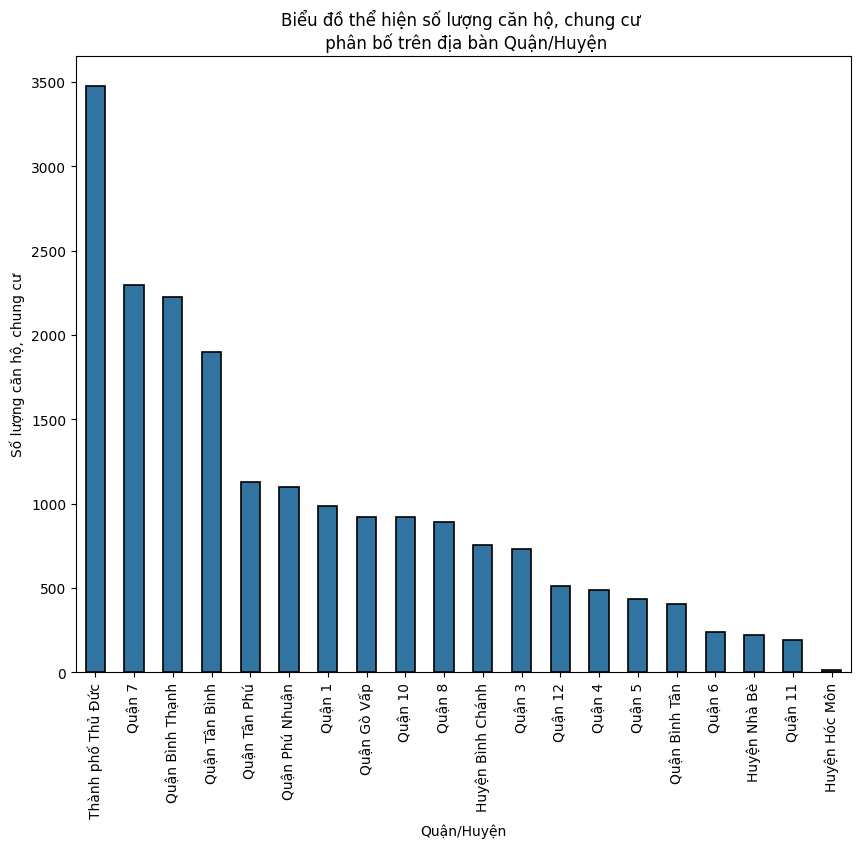

In [5]:
area = df["area_name"].value_counts()
plt.figure(figsize=(10, 8))
sns.barplot(x=area.index, y=area.values, edgecolor="black", width=0.5, linewidth=1.2)
plt.title("Biểu đồ thể hiện số lượng căn hộ, chung cư \n phân bố trên địa bàn Quận/Huyện")
plt.xticks(rotation=90)
plt.xlabel("Quận/Huyện")
plt.ylabel("Số lượng căn hộ, chung cư")
plt.show()

Nhận xét:
- Thành phố Thủ Đức là khu vực có số lượng căn hộ, chung cư lớn nhất, đạt 3480 căn hộ, chung cư.
- Ngoài ra, Quận 7 và Quận Bình Thạnh cũng có số lượng căn hộ, chung cư khá đáng kể, lần lượt là 2299 và 2224 căn hộ, chung cư.
- Các khu vực như Quận Tân Bình, Quận Tân Phú và Quận Phú Nhuận cũng có số lượng căn hộ, chung cư đáng kể.
- Trong khi đó, các khu vực như Huyện Hóc Môn chỉ có số lượng căn hộ, chung cư rất ít, chỉ có 11 căn hộ, chung cư.
- Các khu vực có số lượng căn hộ, chung cư lớn có thể là những vị trí hấp dẫn với nhiều tiện ích và dịch vụ, trong khi các khu vực có số lượng căn hộ, chung cư thấp có thể là những khu vực ít được quan tâm hơn.

### **Biểu đồ thể hiện số lượng căn hộ, chung cư là quảng cáo của công ty**

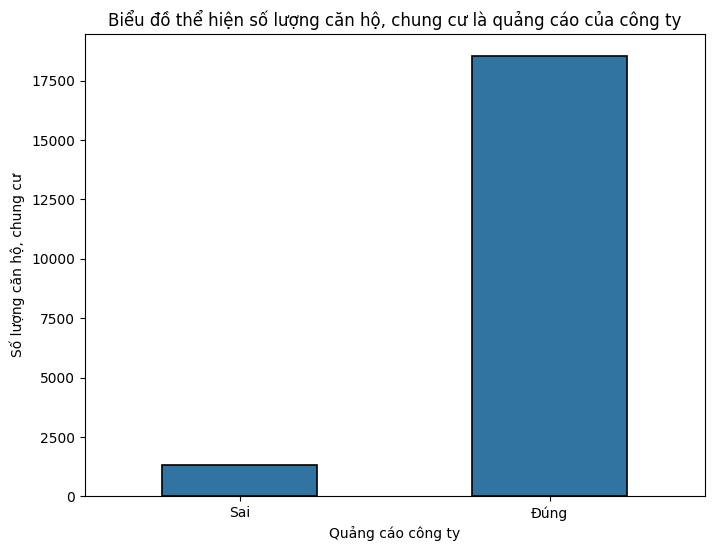

In [6]:
company_ad = df["company_ad"].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=company_ad.index, y=company_ad.values, edgecolor="black", width=0.5, linewidth=1.2)
plt.title("Biểu đồ thể hiện số lượng căn hộ, chung cư là quảng cáo của công ty")
plt.xticks(ticks=range(len(company_ad)), labels=["Sai", "Đúng"])
plt.xlabel("Quảng cáo công ty")
plt.ylabel("Số lượng căn hộ, chung cư")
plt.show()

Nhận xét:
- Số lượng tin đăng do về công ty quảng cáo (True) chiếm phần lớn, với 18527 tin đăng. Trong khi đó, số lượng tin đăng không có quảng cáo (False) chỉ chiếm một phần nhỏ, chỉ có 1302 tin đăng.
- Phần lớn các tin đăng đều đêu fo công ty đăng tin quảng cáo, điều này có thể làm tăng tính minh bạch và sự tin cậy của thông tin được cung cấp cho người tìm kiếm nhà ở.

### **Biểu đồ thể hiện số lượng loại căn hộ, chung cư**

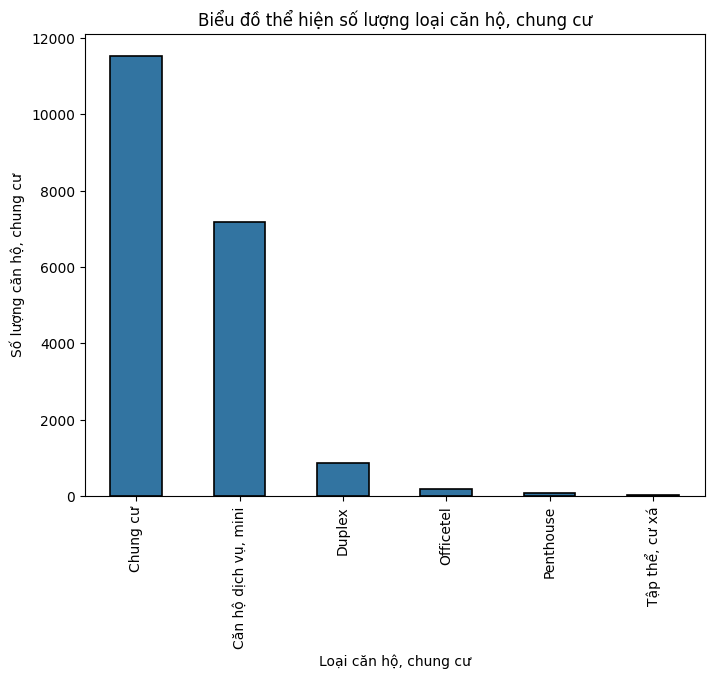

In [7]:
apartment_type = df["apartment_type"].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=apartment_type.index, y=apartment_type.values, edgecolor="black", width=0.5, linewidth=1.2)
plt.title("Biểu đồ thể hiện số lượng loại căn hộ, chung cư")
plt.xticks(rotation=90)
plt.xlabel("Loại căn hộ, chung cư")
plt.ylabel("Số lượng căn hộ, chung cư")
plt.show()

Nhận xét:
- "Chung cư" và "Căn hộ dịch vụ, mini" là hai loại căn hộ, chung cư phổ biến nhất, chiếm phần lớn số lượng tin đăng. Chứng tỏ số người quan tâm đến hai loại này là vô cùng lớn.
- Các loại căn hộ, chung cư khác như "Duplex", "Officetel", "Penthouse" và "Tập thể, cư xá" có số lượng tin đăng ít hơn, đóng góp một phần nhỏ vào thị trường bất động sản.





### **Biểu đồ thể hiện sự phân bố của kích thước căn hộ, chung cư**

In [8]:
# Loại bỏ các giá trị ngoại lai bằng phương pháp z-score
z_score_size = np.abs(stats.zscore(df["size"]))
filtered_size = z_score_size < 1.5

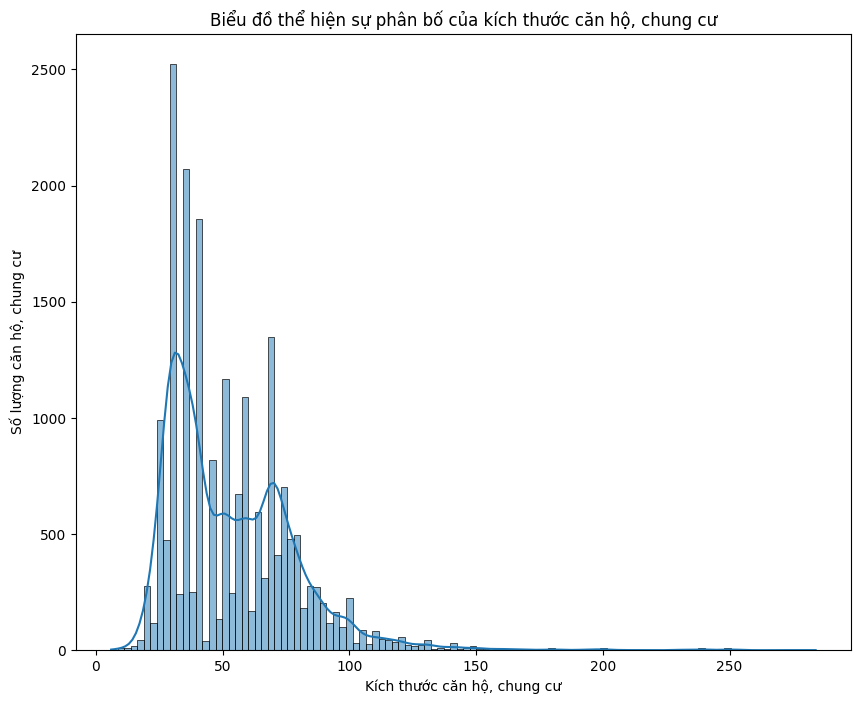

In [9]:
plt.figure(figsize=(10, 8))
sns.histplot(data=df[filtered_size]["size"], kde=True, color="tab:blue")
plt.title("Biểu đồ thể hiện sự phân bố của kích thước căn hộ, chung cư")
plt.xlabel("Kích thước căn hộ, chung cư")
plt.ylabel("Số lượng căn hộ, chung cư")
plt.show()

Nhận xét:
- Kích thước của căn hộ, chung cư sẽ tập trung vào từ 10 mét vuông đến dưới 100 mét vuông là chủ yếu.
- Đây là kích thước phù hợp với lối sống độc thân đến gia đình tiêu chuẩn 4 người ở Việt Nam.

### **Biểu đồ thể hiện số lượng phòng ngủ của căn hộ, chung cư**

In [10]:
# Loại bỏ các giá trị ngoại lai bằng phương pháp z-score
z_score_rooms = np.abs(stats.zscore(df["rooms"]))
filtered_rooms = z_score_rooms < 3

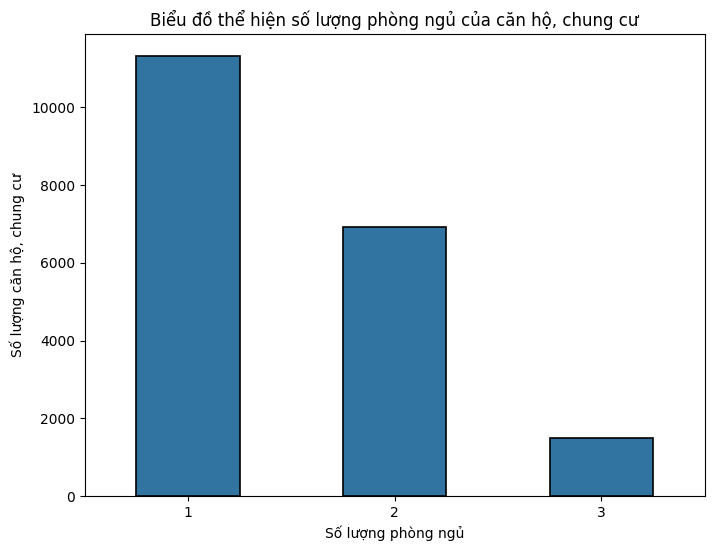

In [11]:
rooms = df[filtered_rooms]["rooms"].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=rooms.index, y=rooms.values, edgecolor="black", width=0.5, linewidth=1.2)
plt.title("Biểu đồ thể hiện số lượng phòng ngủ của căn hộ, chung cư")
plt.xlabel("Số lượng phòng ngủ")
plt.ylabel("Số lượng căn hộ, chung cư")
plt.show()

Nhận xét:
- Số lượng căn hộ, chung cư có 1 phòng ngủ chiếm tỷ lệ lớn nhất, với 11308 căn hộ, chung cư.
- Căn hộ có 2 phòng ngủ cũng phổ biến, với 6917 căn hộ, chung cư.
- Số lượng căn hộ, chung cư có 3 phòng ngủ thấp hơn đáng kể, chỉ có 1486 căn hộ, chung cư.
- Điều này cho thấy rằng phần lớn căn hộ, chung cư trên thị trường thường có 1 hoặc 2 phòng ngủ, điều này có thể phản ánh nhu cầu của người dùng, từ các cá nhân sống độc thân đến các gia đình nhỏ.

### **Biểu đồ thể hiện số lượng toilets của căn hộ, chung cư**

In [12]:
# Loại bỏ các giá trị ngoại lai bằng phương pháp z-score
z_score_toilets = np.abs(stats.zscore(df["toilets"]))
filtered_toilets = z_score_toilets < 3

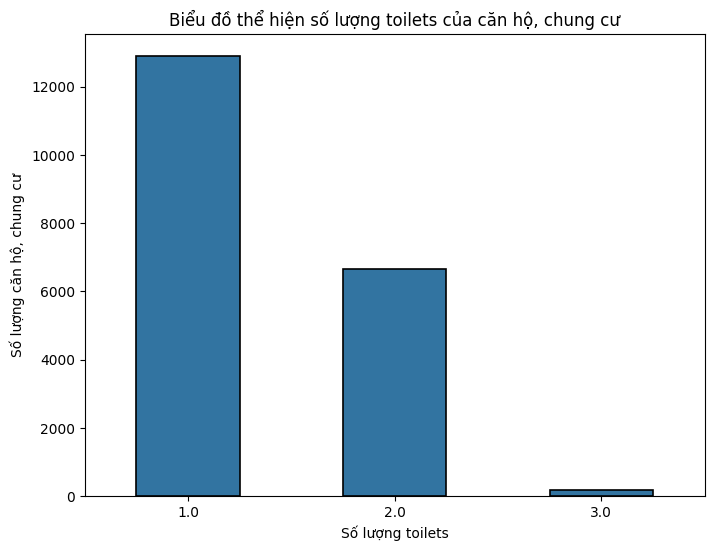

In [13]:
toilets = df[filtered_toilets]["toilets"].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=toilets.index, y=toilets.values, edgecolor="black", width=0.5, linewidth=1.2)
plt.title("Biểu đồ thể hiện số lượng toilets của căn hộ, chung cư")
plt.xlabel("Số lượng toilets")
plt.ylabel("Số lượng căn hộ, chung cư")
plt.show()

Nhận xét:
- Cũng tương tự như số phòng ngủ, số toilet sẽ chủ yếu là 1 đến 2 là phù hợp với cuộc sống độc thân hay gia đình nhỏ.

### **Biểu đồ thể hiện sự phân bố của kinh độ**

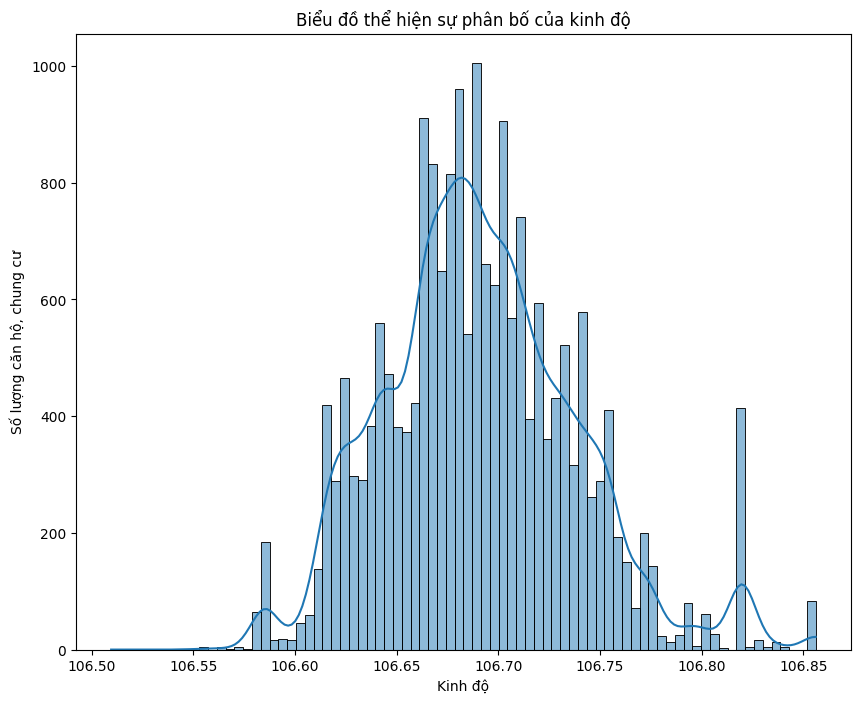

In [14]:
plt.figure(figsize=(10, 8))
sns.histplot(data=df["longitude"], kde=True, color="tab:blue")
plt.title("Biểu đồ thể hiện sự phân bố của kinh độ")
plt.xlabel("Kinh độ")
plt.ylabel("Số lượng căn hộ, chung cư")
plt.show()

### **Biểu đồ thể hiện sự phân bố của vĩ độ**

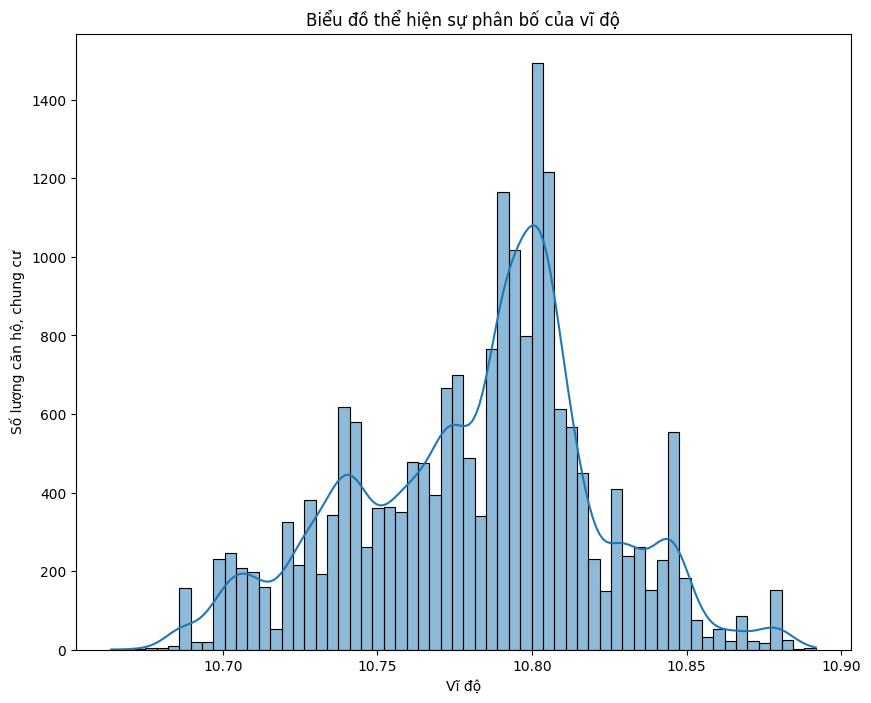

In [15]:
plt.figure(figsize=(10, 8))
sns.histplot(data=df["latitude"], kde=True, color="tab:blue")
plt.title("Biểu đồ thể hiện sự phân bố của vĩ độ")
plt.xlabel("Vĩ độ")
plt.ylabel("Số lượng căn hộ, chung cư")
plt.show()

### **Biểu đồ thể hiện số lượng căn hộ, chung cư cần tiền đặt cọc**

In [16]:
# Nếu tiền đặt cọc > 0 thì has_deposit là True, còn lại là False
df["has_deposit"] = df["deposit"] > 0
df["has_deposit"] = df["has_deposit"].astype(bool)

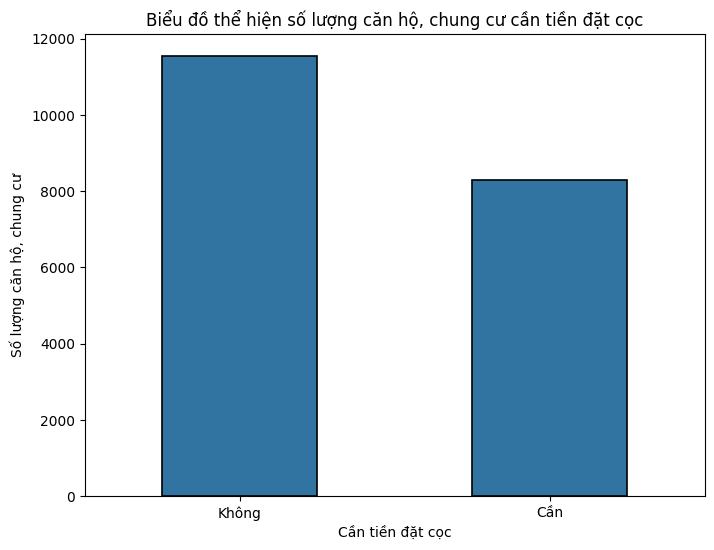

In [17]:
has_deposit = df["has_deposit"].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=has_deposit.index, y=has_deposit.values, edgecolor="black", width=0.5, linewidth=1.2)
plt.title("Biểu đồ thể hiện số lượng căn hộ, chung cư cần tiền đặt cọc")
plt.xticks(ticks=range(len(has_deposit)), labels=["Không", "Cần"])
plt.xlabel("Cần tiền đặt cọc")
plt.ylabel("Số lượng căn hộ, chung cư")
plt.show()

Nhận xét:
- Số lượng tin đăng không yêu cầu đặt cọc (False) chiếm tỷ lệ lớn hơn, với 11541 tin đăng.
- Số lượng tin đăng yêu cầu đặt cọc (True) cũng đáng kể, với 8288 tin đăng.
- Đặt cọc có thể phụ thuộc vào chính sách của từng chủ sở hữu căn hộ, chung cư hoặc quy định cụ thể của thị trường bất động sản.

### **Biểu đồ thể hiện sự phân bố của tiền đặt cọc**

In [18]:
# Lọc ra tiền đặt cọc > 0 và Loại bỏ các giá trị ngoại lai bằng phương pháp z-score
deposit = df.loc[df["deposit"] > 0]["deposit"]
z_score_deposit = np.abs(stats.zscore(deposit))
filtered_deposit = z_score_deposit < 1.5

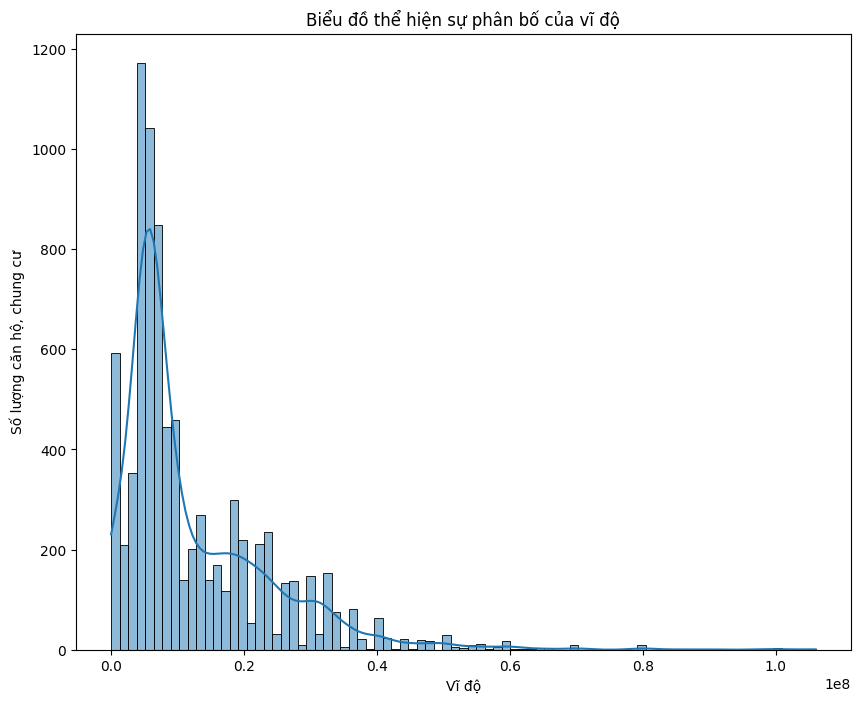

In [19]:
plt.figure(figsize=(10, 8))
sns.histplot(data=deposit[filtered_deposit], kde=True, color="tab:blue")
plt.title("Biểu đồ thể hiện sự phân bố của vĩ độ")
plt.xlabel("Vĩ độ")
plt.ylabel("Số lượng căn hộ, chung cư")
plt.show()

### **Biểu đồ thể hiện sự phân bố Giá thuê trên mỗi mét vuông (VNĐ)**

In [20]:
# Loại bỏ các giá trị ngoại lai bằng phương pháp z-score
z_score_price_million_per_m2 = np.abs(stats.zscore(df["price_million_per_m2"]))
filtered_price_million_per_m2 = z_score_price_million_per_m2 < 1.5

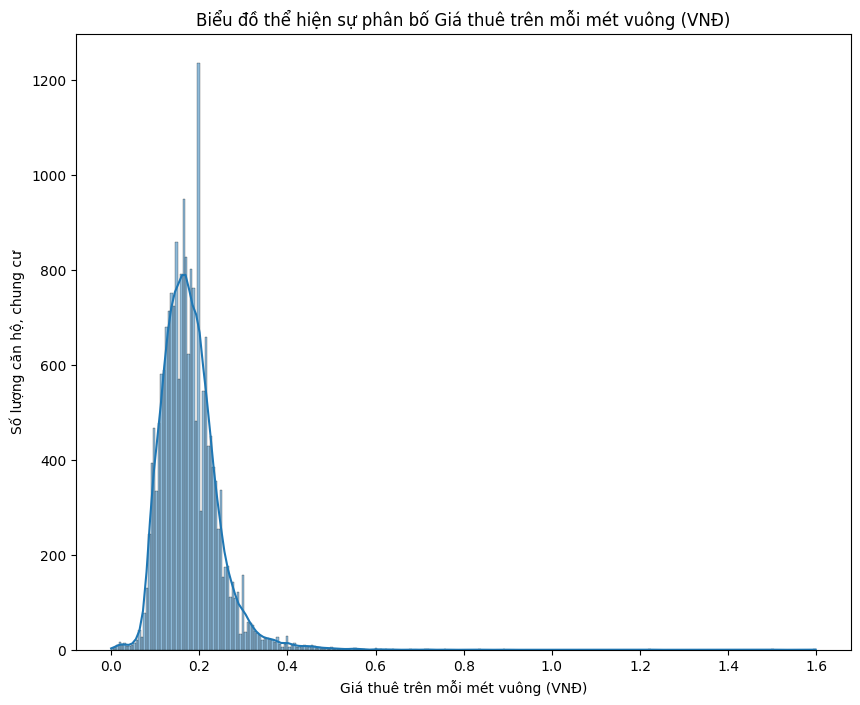

In [21]:
plt.figure(figsize=(10, 8))
sns.histplot(data=df[filtered_price_million_per_m2]["price_million_per_m2"], kde=True, color="tab:blue")
plt.title("Biểu đồ thể hiện sự phân bố Giá thuê trên mỗi mét vuông (VNĐ)")
plt.xlabel("Giá thuê trên mỗi mét vuông (VNĐ)")
plt.ylabel("Số lượng căn hộ, chung cư")
plt.show()

Nhận xét:
- Giá thuê trên mỗi mét vuông sẽ tập chung từ 100.000 đồng đến 400.000 đồng trên mỗi mét vuông của bất động sản.

### **Biểu đồ thể hiện sự phân bố của Giá thuê căn hộ, chung cư (VNĐ)**

In [22]:
# Loại bỏ các giá trị ngoại lai bằng phương pháp z-score
z_score_price = np.abs(stats.zscore(df["price"]))
filtered_price = z_score_price < 1.5

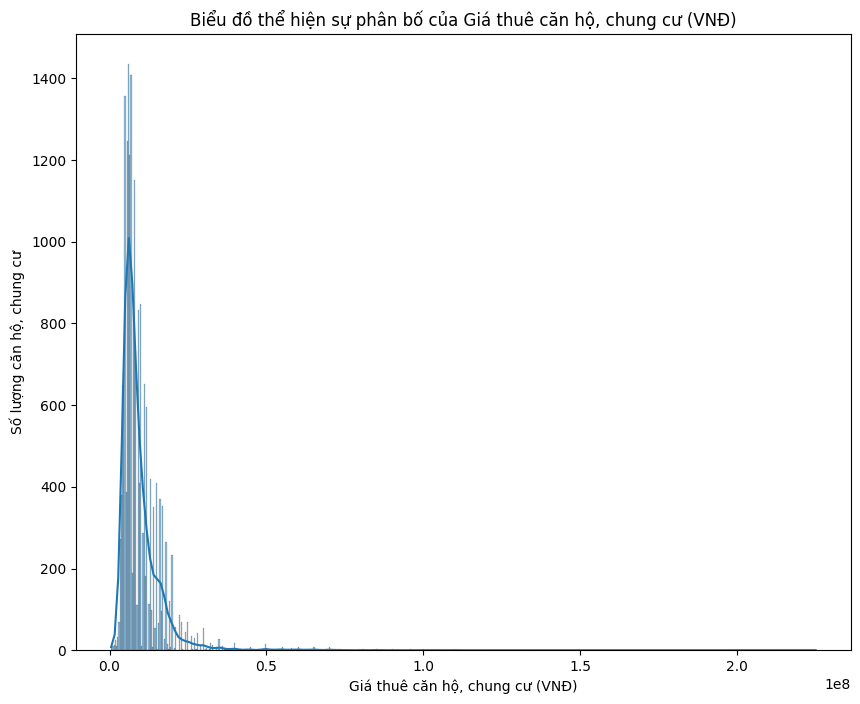

In [23]:
plt.figure(figsize=(10, 8))
sns.histplot(data=df[filtered_price]["price"], kde=True, color="tab:blue")
plt.title("Biểu đồ thể hiện sự phân bố của Giá thuê căn hộ, chung cư (VNĐ)")
plt.xlabel("Giá thuê căn hộ, chung cư (VNĐ)")
plt.ylabel("Số lượng căn hộ, chung cư")
plt.show()

Nhận xét:
- Đa số căn hộ, chung cư sẽ cho thuê từ khoảng trên 1.000.000 đồng đến khoảng 50.000.000 đồng trên một tháng.

## **3.3. Phân tích dữ liệu hai biến**

### **Biểu đồ thể hiện Giá thuê trung bình giữa các Quận/Huyện**

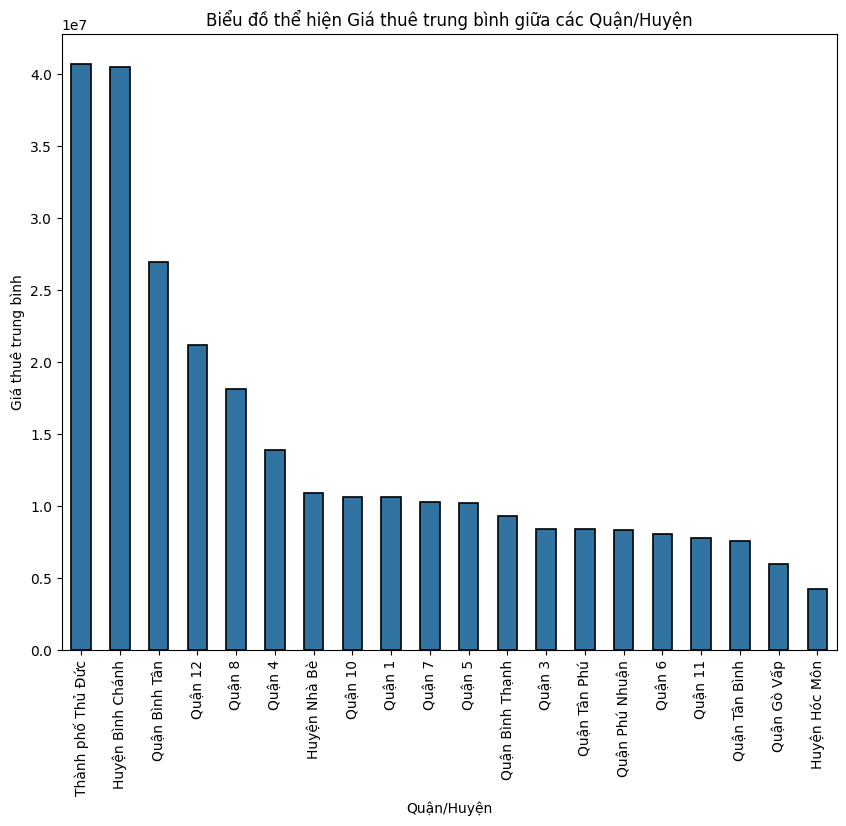

In [24]:
average_price_by_area = df.groupby("area_name")["price"].mean().reset_index()
average_price_by_area = average_price_by_area.sort_values(by="price", ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x="area_name", y="price", data=average_price_by_area, edgecolor="black", width=0.5, linewidth=1.2)
plt.title("Biểu đồ thể hiện Giá thuê trung bình giữa các Quận/Huyện")
plt.xticks(rotation=90)
plt.xlabel("Quận/Huyện")
plt.ylabel("Giá thuê trung bình")
plt.show()

Nhận xét:
- Thành phố Thủ Đức và Huyện Bình Chánh là hai khu vực có giá thuê căn hộ, chung cư cao nhất, với giá trung bình khoảng 40 triệu đồng.
- Quận Bình Tân và Quận 12 cũng có giá thuê căn hộ, chung cư khá cao, khoảng từ 21 đến 27 triệu đồng.
- Các khu vực trung tâm như Quận 1, Quận 3, Quận 4 có giá thuê căn hộ, chung cư ở mức trung bình từ khoảng 8 triệu đến 14 triệu.
- Trong khi đó, các khu vực như Quận Gò Vấp, Quận Tân Bình và Quận 11 có giá thuê căn hộ, chung cư thấp hơn, trong khoảng từ 6 triệu đến 8 triệu đồng. Huyện Hóc Môn có giá thuê căn hộ, chung cư thấp nhất, khoảng 4 triệu đồng mỗi mét vuông.
- Giá thuê căn hộ, chung cư có sự biến động lớn giữa các khu vực, phản ánh sự khác biệt về mức độ phát triển và tiện ích của từng khu vực trên thị trường bất động sản cho thuê.


### **Biểu đồ thể hiện Giá thuê trung bình khi có quảng cáo công ty**

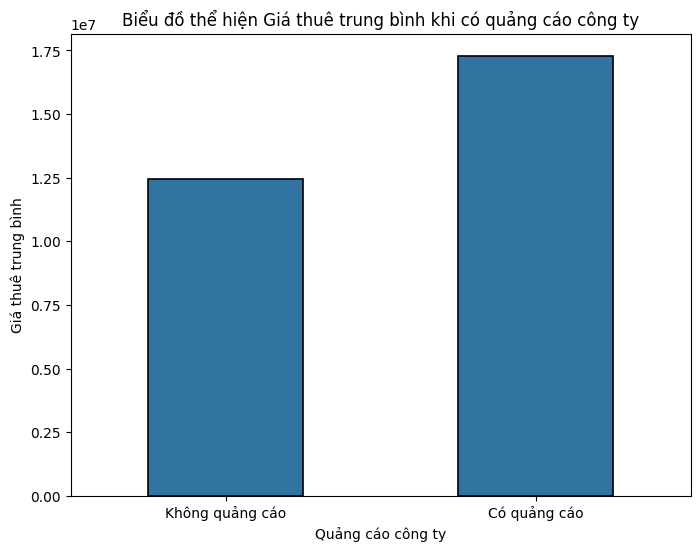

In [25]:
average_price_by_company_ad = df.groupby("company_ad")["price"].mean().reset_index()
average_price_by_company_ad = average_price_by_company_ad.sort_values(by="price", ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(x="company_ad", y="price", data=average_price_by_company_ad, edgecolor="black", width=0.5, linewidth=1.2)
plt.title("Biểu đồ thể hiện Giá thuê trung bình khi có quảng cáo công ty")
plt.xticks(ticks=range(len(average_price_by_company_ad)), labels=["Không quảng cáo", "Có quảng cáo"])
plt.xlabel("Quảng cáo công ty")
plt.ylabel("Giá thuê trung bình")
plt.show()

Nhận xét:
- Căn hộ, chung cư có thông tin về công ty đăng tin quảng cáo (True) có giá trung bình cao hơn, với giá khoảng 17 triệu. Trong khi đó, căn hộ, chung cư không có thông tin về công ty đăng tin quảng cáo (False) có giá trung bình thấp hơn, khoảng 12 triệu.
- Điều này cho thấy rằng căn hộ, chung cư được công ty đăng tin quảng cáo có thể ảnh hưởng đến giá thuê của căn hộ, chung cư, có thể do những căn hộ, chung cư có thông tin quảng cáo chứng minh rõ hơn về tính minh bạch và tin cậy của thông tin được cung cấp và đảm bảo.

### **Biểu đồ thể hiện Giá thuê trung bình giữa các loại căn hộ, chung cư**

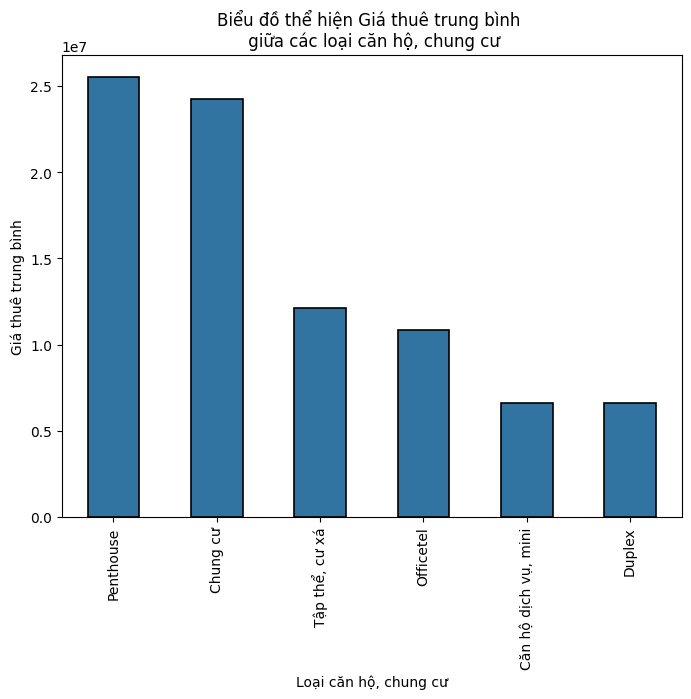

In [26]:
average_price_by_apartment_type = df.groupby("apartment_type")["price"].mean().reset_index()
average_price_by_apartment_type = average_price_by_apartment_type.sort_values(by="price", ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(x="apartment_type", y="price", data=average_price_by_apartment_type, edgecolor="black", width=0.5, linewidth=1.2)
plt.title("Biểu đồ thể hiện Giá thuê trung bình \n giữa các loại căn hộ, chung cư")
plt.xticks(rotation=90)
plt.xlabel("Loại căn hộ, chung cư")
plt.ylabel("Giá thuê trung bình")
plt.show()

Nhận xét:
- Loại căn hộ, chung cư "Penthouse" và "Chung cư" có giá trung bình cao nhất, với giá khoảng 25 triệu. Căn hộ loại "Tập thể, cư xá" có giá trung bình cao hơn so với "Officetel", với giá khoảng 12 triệu và 10 triệu. Các loại căn hộ, chung cư như "Căn hộ dịch vụ, mini" và "Duplex" có giá trung bình thấp nhất, với giá khoảng 6 triệu.
- Điều này cho thấy rằng giá trung bình của căn hộ, chung cư có sự biến động lớn giữa các loại căn hộ, chung cư khác nhau, thể hiện sự đa dạng và phong phú của thị trường bất động sản. Các yếu tố như vị trí, diện tích, và tiện ích cũng có thể ảnh hưởng đến giá thuê của căn hộ, chung cư.


### **Biểu đồ thể hiện Giá thuê trung bình của loại căn hộ, chung cư có hay không đặt cọc**

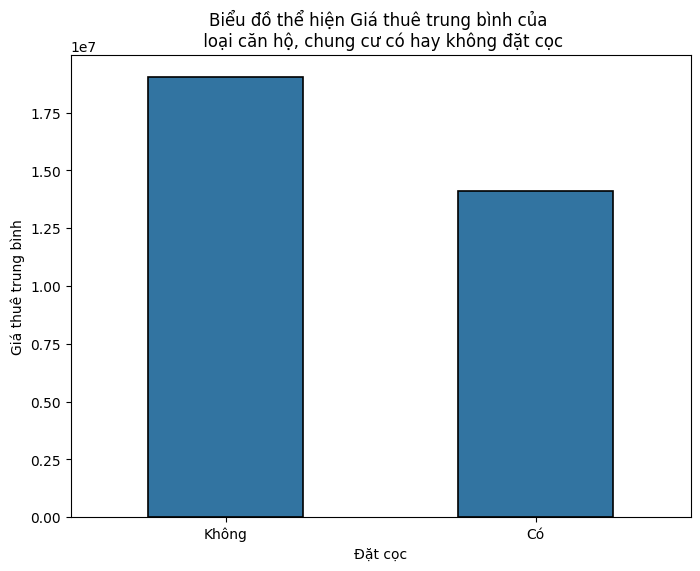

In [27]:
average_price_by_has_deposit = df.groupby("has_deposit")["price"].mean().reset_index()
average_price_by_has_deposit = average_price_by_has_deposit.sort_values(by="price", ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(x="has_deposit", y="price", data=average_price_by_has_deposit, edgecolor="black", width=0.5, linewidth=1.2)
plt.title("Biểu đồ thể hiện Giá thuê trung bình của \n loại căn hộ, chung cư có hay không đặt cọc")
plt.xticks(ticks=range(len(average_price_by_has_deposit)), labels=["Không", "Có"])
plt.xlabel("Đặt cọc")
plt.ylabel("Giá thuê trung bình")
plt.show()

Nhận xét:
- Giá thuê khi không đặt cọc sẽ cao hơn một ít khi thuê có đặt cọc.

### **Biểu đồ thể hiện mối tương quan giữa kích thước căn hộ, chung cư và giá thuê căn hộ, chung cư**

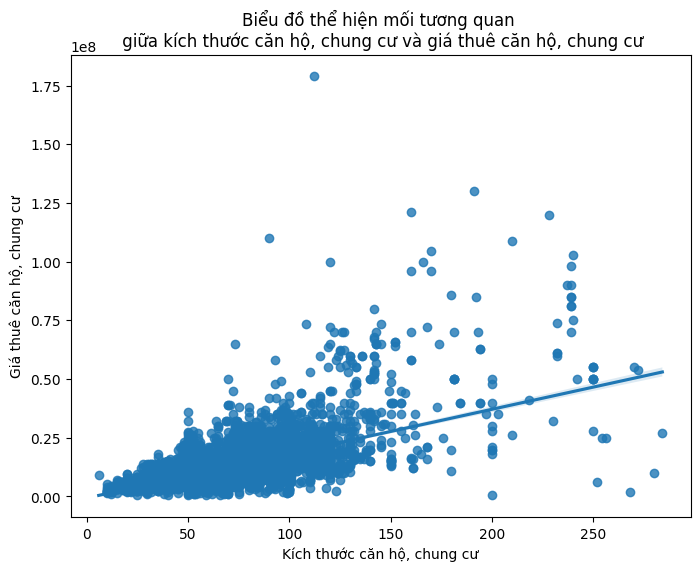

In [28]:
z_score_size = np.abs(stats.zscore(df["size"]))
filtered_size = z_score_size < 1.5
z_score_price = np.abs(stats.zscore(df["price"]))
filtered_price = z_score_price < 1.5

df_filtered = df[filtered_size]
df_filtered = df_filtered[filtered_price]

plt.figure(figsize=(8, 6))
sns.regplot(x="size", y="price", data=df_filtered)
plt.title("Biểu đồ thể hiện mối tương quan \n giữa kích thước căn hộ, chung cư và giá thuê căn hộ, chung cư")
plt.xlabel("Kích thước căn hộ, chung cư")
plt.ylabel("Giá thuê căn hộ, chung cư")
plt.show()

In [29]:
correlation = df_filtered["price"].corr(df_filtered["size"])
correlation

0.6995546225895136

Nhận xét:
- Dựa vào biểu đồ và hệ số tương quan khoảng 0.7 cho ta thấy một mức độ tương quan tích cực mạnh giữa giá thuê căn hộ, chung cư và diện tích của căn hộ, chung cư.
- Điều này ngụ ý rằng trong tập dữ liệu bạn đang xem xét, có xu hướng rõ ràng khi giá thuê căn hộ tăng khi diện tích của căn hộ tăng, và ngược lại.

### **Biểu đồ thể hiện mối tương quan giữa kinh độ và giá thuê căn hộ, chung cư**

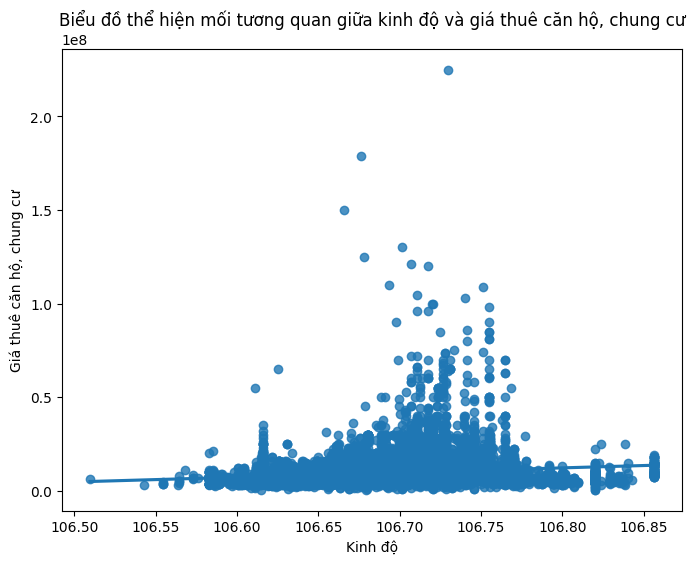

In [30]:
z_score_price = np.abs(stats.zscore(df["price"]))
filtered_price = z_score_price < 1.5
df_filtered = df[filtered_price]

plt.figure(figsize=(8, 6))
sns.regplot(x="longitude", y="price", data=df_filtered)
plt.title("Biểu đồ thể hiện mối tương quan giữa kinh độ và giá thuê căn hộ, chung cư")
plt.xlabel("Kinh độ")
plt.ylabel("Giá thuê căn hộ, chung cư")
plt.show()

In [31]:
correlation = df_filtered["price"].corr(df_filtered["longitude"])
correlation

0.1665472541919001

Nhận xét:
- Dựa vào biểu đồ và hệ số tương quan khoảng 0.1665 cho ta thấy một mức độ tương quan tích cực yếu giữa giá thuê căn hộ, chung cư và kinh độ của căn hộ, chung cư.
- Điều này ngụ ý rằng trong tập dữ liệu bạn đang xem xét, khi thay đổi kinh độ, giá thuê biến động không đáng kể.

### **Biểu đồ thể hiện mối tương quan giữa vĩ độ và giá thuê căn hộ, chung cư**

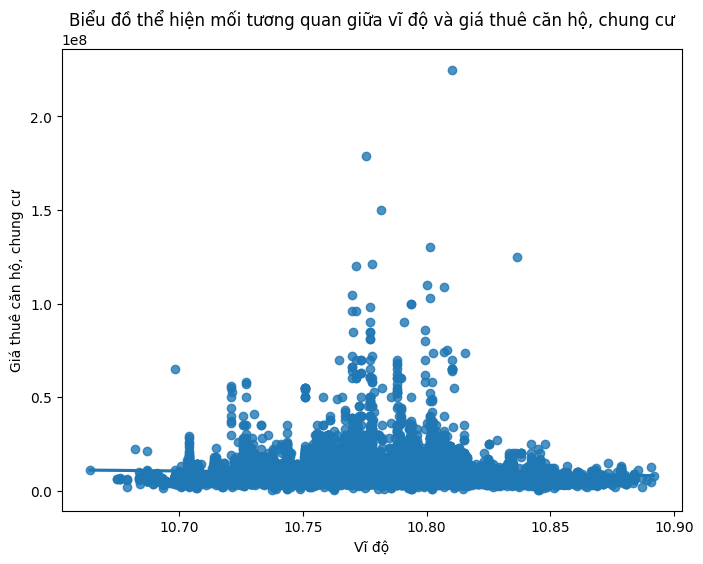

In [32]:
plt.figure(figsize=(8, 6))
sns.regplot(x="latitude", y="price", data=df_filtered)
plt.title("Biểu đồ thể hiện mối tương quan giữa vĩ độ và giá thuê căn hộ, chung cư")
plt.xlabel("Vĩ độ")
plt.ylabel("Giá thuê căn hộ, chung cư")
plt.show()

In [33]:
correlation = df_filtered["price"].corr(df_filtered["latitude"])
correlation

-0.06972588054876856

Nhận xét:
- Dựa vào biểu đồ và hệ số tương quan khoảng -0.0697 cho ta thấy một mức độ tương quan tiêu cực yếu giữa giá thuê căn hộ, chung cư và vĩ độ của căn hộ, chung cư.
- Điều này ngụ ý rằng trong tập dữ liệu bạn đang xem xét, khi thay đổi vĩ độ, giá thuê biến động không đáng kể.

### **Biểu đồ thể hiện mối tương quan giữa tiền đặt cọc và giá thuê căn hộ, chung cư**

In [34]:
deposit = df.loc[df["deposit"] > 0]
z_score_deposit = np.abs(stats.zscore(deposit["deposit"]))
filtered_deposit = z_score_deposit < 1.5

z_score_price = np.abs(stats.zscore(df["price"]))
filtered_price = z_score_price < 1.5

df_filtered = deposit[filtered_deposit]
df_filtered = df_filtered[filtered_price]

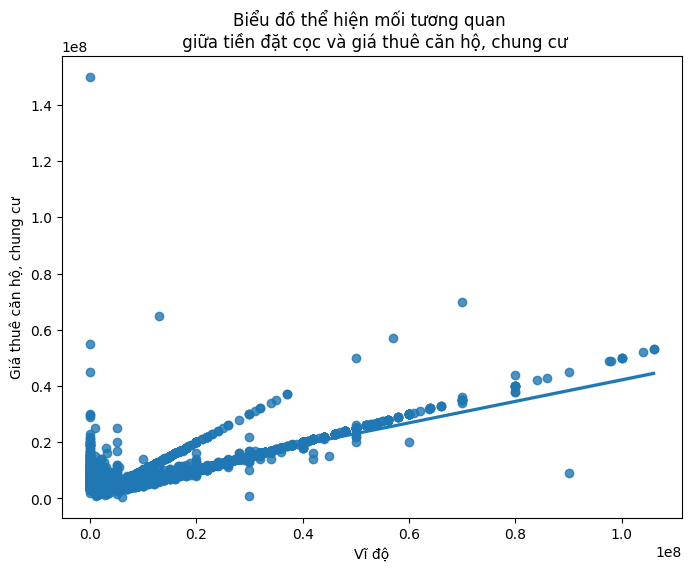

In [35]:
plt.figure(figsize=(8, 6))
sns.regplot(x="deposit", y="price", data=df_filtered)
plt.title("Biểu đồ thể hiện mối tương quan \n giữa tiền đặt cọc và giá thuê căn hộ, chung cư")
plt.xlabel("Vĩ độ")
plt.ylabel("Giá thuê căn hộ, chung cư")
plt.show()

In [36]:
correlation = df_filtered["price"].corr(df_filtered["deposit"])
correlation

0.8240938710778576

Nhận xét:
- Dựa vào biểu đồ và hệ số tương quan khoảng 0.8241 cho ta thấy một mức độ tương quan tích cực mạnh giữa tiền đặt cọc và giá thuê căn hộ, chung cư.
- Điều này ngụ ý rằng trong tập dữ liệu bạn đang xem xét, khi thay đổi tiền đặt cọc, giá thuê biến động rất nhiều.

## **3.4. Phân tích dữ liệu đa biến**

### **Ở mỗi quận/huyện, loại hình căn hộ, chung cư nào là phổ biến nhất và giá thuê trung bình là bao nhiêu?**

In [37]:
grouped_data = df.groupby(["area_name", "apartment_type"])["price"].mean().reset_index()
grouped_data = grouped_data.rename(columns={"price": "avg_price"})

apartment_type_counts_by_area = df.groupby(["area_name", "apartment_type"]).size().reset_index(name="count")
apartment_type_counts_by_area = pd.merge(grouped_data, apartment_type_counts_by_area, on=["area_name", "apartment_type"])

max_count_indices = apartment_type_counts_by_area.groupby("area_name")["count"].idxmax()
apartment_type_counts_by_area.loc[max_count_indices].sort_values(by="avg_price")

,area_name,apartment_type,avg_price,count
5,Huyện Hóc Môn,Chung cư,4.342857e+06,7
80,Quận Gò Vấp,"Căn hộ dịch vụ, mini",5.207361e+06,624
91,Quận Tân Bình,"Căn hộ dịch vụ, mini",6.553843e+06,1106
69,Quận Bình Thạnh,"Căn hộ dịch vụ, mini",6.937518e+06,1142
85,Quận Phú Nhuận,"Căn hộ dịch vụ, mini",7.126178e+06,555
35,Quận 3,"Căn hộ dịch vụ, mini",7.822197e+06,401
14,Quận 1,"Căn hộ dịch vụ, mini",8.014705e+06,546
25,Quận 11,Chung cư,9.713752e+06,101
51,Quận 6,Chung cư,9.901348e+06,141
96,Quận Tân Phú,Chung cư,1.129901e+07,629


Nhận xét:
- Chung cư và Căn hộ dịch vụ, mini là hai loại hình được thuê nhiều nhất với giá trung bình từ 5.000.000 đồng đến 50.000.000 đồng tùy thuộc khu vực.

### **Kích thước, số phòng ngủ, số toilet và giá thuê ảnh hưởng tới nhau như thế nào?**

In [38]:
z_score_size = np.abs(stats.zscore(df["size"]))
filtered_size = z_score_size < 1.5

z_score_rooms = np.abs(stats.zscore(df["rooms"]))
filtered_rooms = z_score_rooms < 3

z_score_toilets = np.abs(stats.zscore(df["toilets"]))
filtered_toilets = z_score_toilets < 3

z_score_price = np.abs(stats.zscore(df["price"]))
filtered_price = z_score_price < 1.5

df_filtered = df[filtered_size]
df_filtered = df_filtered[filtered_rooms]
df_filtered = df_filtered[filtered_toilets]
df_filtered = df_filtered[filtered_price]

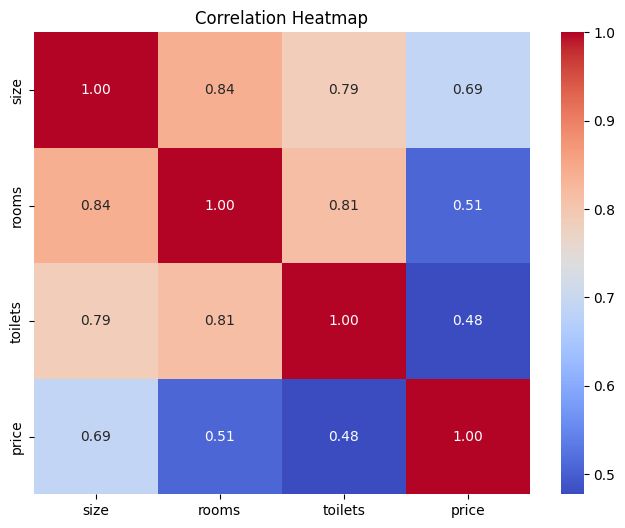

In [39]:
correlation_matrix = df_filtered[["size", "rooms", "toilets", "price"]].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

Nhận xét:
- Kích thước (size) có mối tương quan cao với số phòng (rooms) và số phòng vệ sinh (toilets), với các hệ số tương quan lần lượt là 0.840 và 0.786. Điều này ngụ ý rằng diện tích của căn hộ thường tăng đồng thời với số lượng phòng và phòng vệ sinh.
- Số phòng (rooms) và số phòng vệ sinh (toilets) cũng có mối tương quan cao với nhau, với hệ số tương quan là 0.814. Điều này có thể phản ánh thực tế rằng căn hộ có nhiều phòng thường có nhiều phòng vệ sinh hơn.
- Giá thuê (price) có mối tương quan tương đối mạnh với kích thước (size), với hệ số tương quan là 0.690. Điều này ngụ ý rằng giá thuê của căn hộ thường tăng đồng thời với diện tích của căn hộ.
